<a href="https://colab.research.google.com/github/stepan-fukalov/fake-news-ai/blob/master/fake_news_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news AI

## 1. Downloading and preparing data

### 1.1 Downloading test and train datasets

In [ ]:
!gdown 1i5siUuasrbtLSXPfi7kP2issY6v9JPbi # Train dataset
!gdown 1Kw3JsSOCczllXaxVmStglBa4NGN80lUK # Test dataset
!gdown 1DRzpXeGgcBULy3fpujm2ouTgKXqhnBAv # Kaggle submition

Downloading...
From: https://drive.google.com/uc?id=1i5siUuasrbtLSXPfi7kP2issY6v9JPbi
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Kw3JsSOCczllXaxVmStglBa4NGN80lUK
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 137MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1DRzpXeGgcBULy3fpujm2ouTgKXqhnBAv
To: /content/submit.csv
100% 41.6k/41.6k [00:00<00:00, 76.5MB/s]


In [ ]:
import pandas as pd
train_df = pd.read_csv("/content/train.csv")
submition_df = pd.read_csv("/content/test.csv")
sample_submition = pd.read_csv("/content/submit.csv")

In [ ]:
train_df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
train_df["title"] = train_df["title"].astype("str")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## 2. Cleaning data

### 2.1 Leaving only titles and labels in dataset



In [ ]:
train_df = train_df[["title", "label"]]
train_df

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### 2.2 Dropping N/A

In [ ]:
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

<ipython-input-159-ac397e1d8ef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)


Dropping titles that are not in english

In [ ]:
# Installing langdetect
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langdetect import detect
from tqdm.auto import tqdm

def detect_lang(text):
  lang = None
  try:
    lang = detect(text)
  except:
    print(f"Unable to recongnize language on text: {text}")
  return lang

titles = train_df["title"]
langs = []
for text in tqdm(titles):
  langs.append(detect_lang(text))

  0%|          | 0/20800 [00:00<?, ?it/s]

Unable to recongnize language on text: https://youtu.be/BFpFCy_b2SM


In [ ]:
train_df["lang"] = langs
train_df = train_df[train_df["lang"]=="en"]
# Drop language, no longer need
train_df = train_df.drop('lang', axis=1)

## 3. Data preprocessing using NLTK


### 3.1 Tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train_df["title"] = train_df["title"].apply(lambda x: x.lower())
train_df["title"] = train_df["title"].apply(word_tokenize)

In [ ]:
train_df["title"]

0        [house, dem, aide, :, we, didn, ’, t, even, se...
1        [flynn, :, hillary, clinton, ,, big, woman, on...
2                [why, the, truth, might, get, you, fired]
3        [15, civilians, killed, in, single, us, airstr...
4        [iranian, woman, jailed, for, fictional, unpub...
                               ...                        
20795    [rapper, t.i, ., :, trump, a, ’, poster, child...
20796    [n.f.l, ., playoffs, :, schedule, ,, matchups,...
20797    [macy, ’, s, is, said, to, receive, takeover, ...
20798    [nato, ,, russia, to, hold, parallel, exercise...
20799                      [what, keeps, the, f-35, alive]
Name: title, Length: 19274, dtype: object

### 3.2 Removing stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

def remove_stop_words(text, stops):
  new_text = [word for word in text if word not in stops]
  return new_text if new_text else None

stops = set(stopwords.words("english"))
train_df["title"] = train_df["title"].apply(lambda text: remove_stop_words(text, stops))
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.3 Getting rid of punctuation


In [ ]:
def remove_punctuation(text):
  # Leaving words that contain only alphabetical symbols or alphabetical symbols and numbers.
  new_text = []
  for word in text:
    length = len(word)
    only_alpha = len([s for s in word if s.isalpha()])==length
    only_digit = len([s for s in word if s.isdigit()])==length
    alpha_and_digit = len([s for s in word if (s.isalpha() or s.isdigit())])==length
    if only_alpha or (alpha_and_digit and not only_digit):
      new_text.append(word)
  return new_text if new_text else None

train_df["title"] = train_df["title"].apply(remove_punctuation)
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df["title"]

0        [house, dem, aide, even, see, comey, letter, j...
1        [flynn, hillary, clinton, big, woman, campus, ...
2                               [truth, might, get, fired]
3        [civilians, killed, single, us, airstrike, ide...
4        [iranian, woman, jailed, fictional, unpublishe...
                               ...                        
19262     [rapper, trump, poster, child, white, supremacy]
19263    [playoffs, schedule, matchups, odds, new, york...
19264    [macy, said, receive, takeover, approach, huds...
19265    [nato, russia, hold, parallel, exercises, balk...
19266                                       [keeps, alive]
Name: title, Length: 19267, dtype: object

### 3.4 Stemming words

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
train_df["title"] = train_df["title"].apply(lambda text: [stemmer.stem(word) for word in text])
train_df["title"]

0        [hous, dem, aid, even, see, comey, letter, jas...
1        [flynn, hillari, clinton, big, woman, campu, b...
2                                [truth, might, get, fire]
3          [civilian, kill, singl, us, airstrik, identifi]
4        [iranian, woman, jail, fiction, unpublish, sto...
                               ...                        
19262     [rapper, trump, poster, child, white, supremaci]
19263    [playoff, schedul, matchup, odd, new, york, time]
19264    [maci, said, receiv, takeov, approach, hudson,...
19265      [nato, russia, hold, parallel, exercis, balkan]
19266                                         [keep, aliv]
Name: title, Length: 19267, dtype: object

## 4. Text Feature Extraction using TF-IDF

### 4.1 Fitting TF-IDF matrix

In [ ]:
titles = train_df["title"]
titles

0        [hous, dem, aid, even, see, comey, letter, jas...
1        [flynn, hillari, clinton, big, woman, campu, b...
2                                [truth, might, get, fire]
3          [civilian, kill, singl, us, airstrik, identifi]
4        [iranian, woman, jail, fiction, unpublish, sto...
                               ...                        
19262     [rapper, trump, poster, child, white, supremaci]
19263    [playoff, schedul, matchup, odd, new, york, time]
19264    [maci, said, receiv, takeov, approach, hudson,...
19265      [nato, russia, hold, parallel, exercis, balkan]
19266                                         [keep, aliv]
Name: title, Length: 19267, dtype: object

In [ ]:
# Creating TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def custom_tokenizer(text):
  return text

tfidf = TfidfVectorizer(tokenizer=custom_tokenizer,
                        preprocessor=custom_tokenizer,
                        token_pattern=None)
features = tfidf.fit_transform(titles).toarray()
features.shape

(19267, 13290)

### 4.2 Feature selection

In [ ]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
print(f"Feature shape: {features.shape}")
print(f"Feature names: {feature_names}")

feature_results = []

for X in tqdm(train_df.groupby("label")):
  title_id = list(X[1]["title"].index)
  label = X[1]["label"].iloc[0]
  result = [x[title_id].mean() for x in features.T]
  indices = np.argsort(result)[::-1]
  result_names = feature_names[indices]
  feature_results.append(result_names)

feature_results = np.array(feature_results)

print(f"Feature results shape: {feature_results.shape}")

Feature shape: (19267, 13290)
Feature names: ['09l' '100' '1000' ... 'ریزی' 'ضمیر' 'ناخوداگاه']


  0%|          | 0/2 [00:00<?, ?it/s]

Feature results shape: (2, 13290)


In [ ]:
# Top words in True News Titles
feature_results[0][:100]

array(['new', 'york', 'time', 'breitbart', 'trump', 'donald', 'say',
       'brief', 'obama', 'attack', 'clinton', 'state', 'presid', 'even',
       'hous', 'report', 'news', 'plan', 'kill', 'democrat', 'white',
       'call', 'hillari', 'bill', 'polic', 'get', 'die', 'russia', 'year',
       'immigr', 'first', 'day', 'show', 'court', 'media', 'may',
       'american', 'republican', 'china', 'back', 'border', 'syria',
       'nation', 'health', 'women', 'take', 'california', 'elect',
       'offic', 'man', 'fight', 'one', 'leader', 'protest', 'case',
       'vote', 'fire', 'ban', 'north', 'citi', 'fake', 'obamacar',
       'campaign', 'make', 'deal', 'polit', 'senat', 'order', 'law',
       'rule', 'shoot', 'watch', 'terror', 'race', 'wall', 'million',
       'face', 'claim', 'america', 'migrant', 'find', 'offici', 'leav',
       'texa', 'islam', 'go', 'support', 'arrest', 'chang', 'want',
       'home', 'illeg', 'russian', 'big', 'keep', 'end', 'right', 'turn',
       'use', 'job'], d

In [ ]:
# Top words in Fake News Titles
feature_results[1][:100]

array(['hillari', 'trump', 'clinton', 'elect', 'us', 'war', 'fbi',
       'video', 'russia', 'email', 'america', 'vote', 'world', 'news',
       'comment', 'obama', 'american', 'donald', 'day', 'break',
       'wikileak', 'presid', 'say', 'state', 'campaign', 'win', 'support',
       'putin', 'new', 'investig', 'media', 'black', 'russian', 'report',
       'get', 'peopl', 'syria', 'call', 'protest', 'voter', 'make',
       'year', 'go', 'reveal', 'polic', 'expos', 'watch', 'kill', 'like',
       'use', 'one', 'isi', 'white', 'right', 'govern', 'rig', 'could',
       'take', 'polit', 'come', 'happen', 'life', 'attack', 'poll',
       'want', 'stand', 'man', 'million', 'comey', 'sourc', 'show',
       'democrat', 'nation', 'thing', 'warn', 'know', 'first', 'muslim',
       'plan', 'real', 'way', 'end', 'victori', 'power', 'rock', 'leak',
       'top', 'inform', 'forc', 'mosul', 'novemb', 'live', 'gold',
       'onion', 'need', 'reason', 'hous', 'look', 'shock', 'stop'],
      dtype=objec

## 5. Models for classification

### 5.1 Naive Bayes Classifier

The one most suitable for word counts is the multinomial variant:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X = train_df["title"].values
y = train_df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
count_vect = CountVectorizer(tokenizer=custom_tokenizer,
                             preprocessor=custom_tokenizer,
                             token_pattern=None)
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)
sample = [["cat", "fight", "dog"]]
sample_counts = count_vect.transform(sample)
clf.predict(sample_counts)

array([1])

### 5.2 Model Selection
We will benchmark the following four models:
1. Logistic Regression
2. (Multinomial) Naive Bayes
3. Linear Support Vector Machine
4. Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

labels = train_df["label"]

models = [
    LogisticRegression(),
    MultinomialNB(),
    LinearSVC(),
    RandomForestClassifier(n_estimators=200,
                           max_depth=3)
]

entries = []
for model in tqdm(models):
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy')
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.934136
LogisticRegression        0.921420
MultinomialNB             0.874085
RandomForestClassifier    0.599574
Name: accuracy, dtype: float64

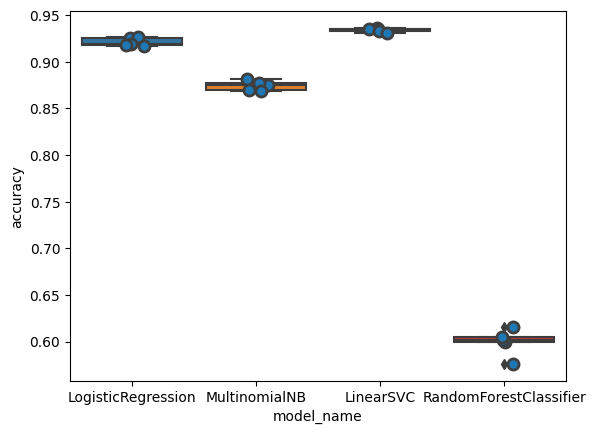

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 93%.

## 6. Let's make predictions and prepare for kaggle submition

### 6.1 Data preprocessing 

In [ ]:
# Tokenizing
submition_df["title"] = submition_df["title"].astype(str)
submition_df["title"] = submition_df["title"].apply(lambda x: x.lower())
submition_df["title"] = submition_df["title"].apply(word_tokenize)

In [ ]:
# Stop words
submition_df["title"] = submition_df["title"].apply(lambda text: remove_stop_words(text, stops))
submition_df.dropna(inplace=True)
submition_df.reset_index(drop=True, inplace=True)

In [ ]:
# Punctuation
submition_df["title"] = submition_df["title"].apply(remove_punctuation)
submition_df.dropna(inplace=True)
submition_df.reset_index(drop=True, inplace=True)

In [ ]:
# Stemming
train_df["title"] = train_df["title"].apply(lambda text: [stemmer.stem(word) for word in text])
train_df["title"]

0        [hou, dem, aid, even, see, comey, letter, jaso...
1        [flynn, hillari, clinton, big, woman, campu, b...
2                                [truth, might, get, fire]
3          [civilian, kill, singl, us, airstrik, identifi]
4        [iranian, woman, jail, fiction, unpublish, sto...
                               ...                        
19262     [rapper, trump, poster, child, white, supremaci]
19263    [playoff, schedul, matchup, odd, new, york, time]
19264    [maci, said, receiv, takeov, approach, hudson,...
19265       [nato, russia, hold, parallel, exerci, balkan]
19266                                         [keep, aliv]
Name: title, Length: 19267, dtype: object

### 6.2 Fitting the model
Let's choose LinearSVC model for predicting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

X = train_df["title"].values
y = train_df["label"].values

# TF-IDF
count_vect = CountVectorizer(tokenizer=custom_tokenizer,
                             preprocessor=custom_tokenizer,
                             token_pattern=None)
X_counts = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Fitting the model and making predictions
clf = LinearSVC(random_state=42).fit(X_tfidf, y)
X_sub = submition_df["title"]
id_sub = submition_df["id"]

X_sub_counts = count_vect.transform(X_sub)
X_sub_tfidf = tfidf_transformer.transform(X_sub_counts)
y_sub_preds = clf.predict(X_sub_tfidf)

In [ ]:
my_submition = sample_submition.copy()
my_submition["label"] = np.ones(len(my_submition), dtype="int64")
my_submition.loc[my_submition["id"].isin(id_sub), "label"] = y_sub_preds
my_submition

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1


In [ ]:
from pathlib import Path
filepath = Path("output/my_submition.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
my_submition.to_csv(filepath, index=False)
# Final score: 0.92142